# Roller Coaster

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [3]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# load rankings data
wood=pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
print(wood.head())
# load rankings data
steel=pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
print(steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

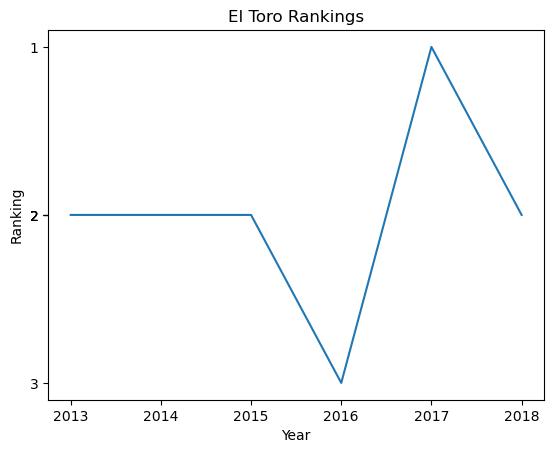

<Figure size 640x480 with 0 Axes>

In [7]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def rank_ovrtime(coaster_name,park_name,material_df):
    coaster_ranking=material_df[(material_df['Name']== coaster_name) & (material_df['Park'] == park_name)]
    ax=plt.subplot()
    plt.plot(coaster_ranking['Year of Rank'],coaster_ranking['Rank'])
    ax.set_xticks(coaster_ranking['Year of Rank'].values)
    ax.set_yticks(coaster_ranking['Rank'].values)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title("{} Rankings".format(coaster_name))
    plt.show()
    plt.clf()
    
# Create a plot of El Toro ranking over time
rank_ovrtime('El Toro','Six Flags Great Adventure',wood)

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

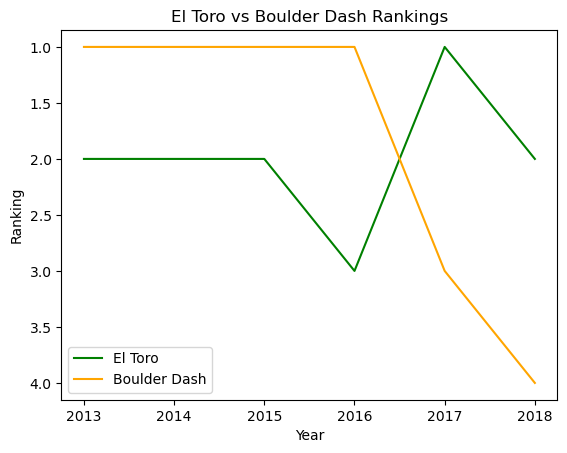

<Figure size 640x480 with 0 Axes>

In [13]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def two_ranks_ovrtime(coaster_name_1,park_name_1,coaster_name_2,park_name_2,material_df):
    coaster_ranking_1=material_df[(material_df['Name']== coaster_name_1) & (material_df['Park'] == park_name_1)]
    coaster_ranking_2=material_df[(material_df['Name']== coaster_name_2) & (material_df['Park'] == park_name_2)]
    ax=plt.subplot()
    plt.plot(coaster_ranking_1['Year of Rank'],coaster_ranking_1['Rank'],label=coaster_name_1,color='green')
    plt.plot(coaster_ranking_2['Year of Rank'],coaster_ranking_2['Rank'],label=coaster_name_2,color='orange')
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title("{} vs {} Rankings".format(coaster_name_1,coaster_name_2))
    plt.legend()
    plt.show()
    plt.clf()
# Create a plot of El Toro and Boulder Dash roller coasters
two_ranks_ovrtime('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

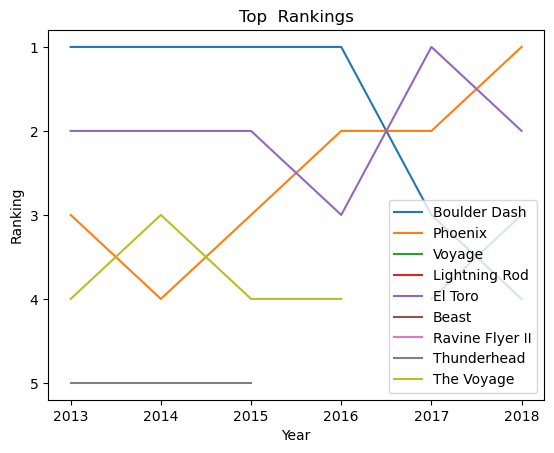

<Figure size 640x480 with 0 Axes>

In [22]:
# 4
# Create a function to plot top n rankings over time
def top_n(n,material_df):
    top_ranking=material_df[material_df['Rank'] <= n]
    ax=plt.subplot()
    for coaster in set(top_ranking['Name']):
        coaster_ranking=top_ranking[top_ranking['Name'] == coaster]
        plt.plot(coaster_ranking['Year of Rank'],coaster_ranking['Rank'],label=coaster)
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    plt.title("Top  Rankings")
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc=4)
    plt.show()
    plt.clf()
# Create a plot of top n rankings over time
top_n(5,wood)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [25]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

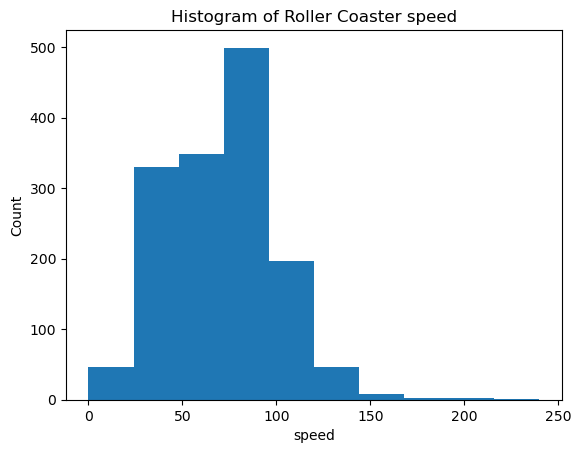

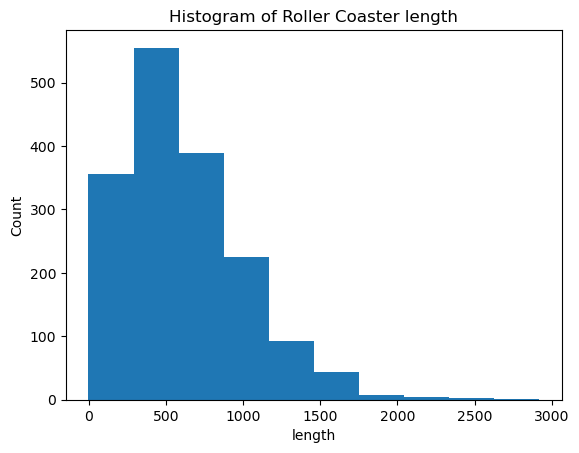

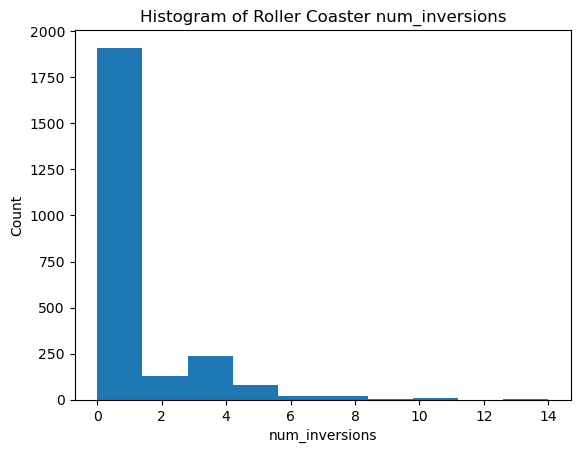

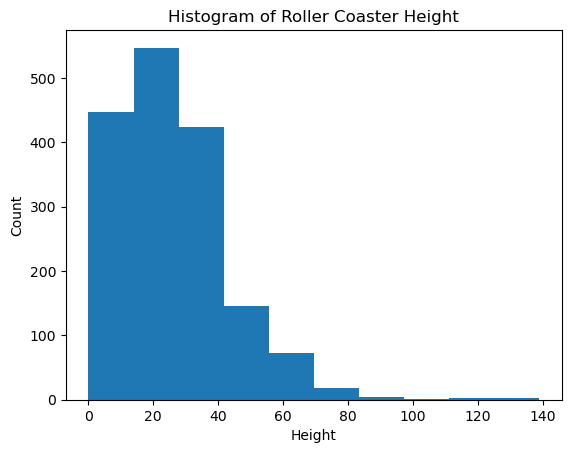

<Figure size 640x480 with 0 Axes>

In [28]:
# 6
# Create a function to plot histogram of column values
def plot_histgrom(coaster_df,colmn_name):
    plt.hist(coaster_df[colmn_name].dropna())
    plt.xlabel(colmn_name)
    plt.ylabel('Count')
    plt.title('Histogram of Roller Coaster {}'.format(colmn_name))
    plt.show()
    plt.clf()


# Create histogram of roller coaster speed
plot_histgrom(roller_coasters ,'speed')


# Create histogram of roller coaster length
plot_histgrom(roller_coasters ,'length')


# Create histogram of roller coaster number of inversions
plot_histgrom(roller_coasters ,'num_inversions')


# Create a function to plot histogram of height values
def plot_height_histogram(coaster_df):
    heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()
    plt.clf()


# Create a histogram of roller coaster height
plot_height_histogram(roller_coasters)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

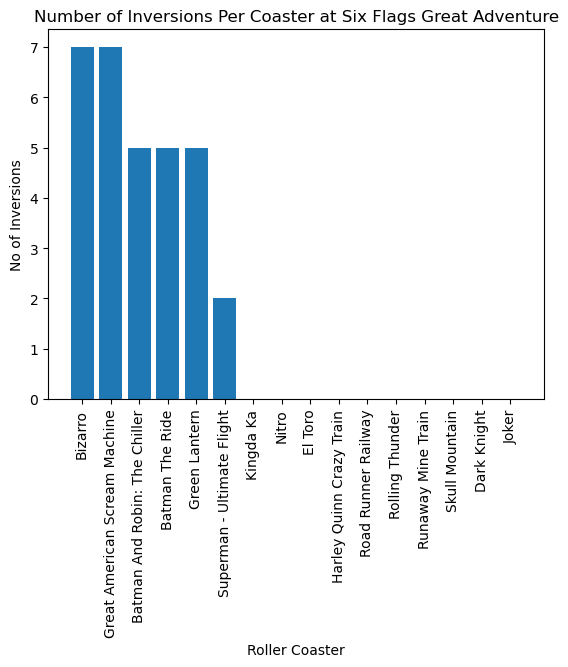

<Figure size 640x480 with 0 Axes>

In [31]:
# 7
# Create a function to plot inversions by coaster at park
def plot_bar(coaster_df,park_name):
    park_coaster=coaster_df[coaster_df['park'] == park_name]
    park_coaster=park_coaster.sort_values('num_inversions',ascending=False)
    coaster_names=park_coaster['name']
    num_inversions=park_coaster['num_inversions']
    ax=plt.subplot()
    plt.bar(range(len(coaster_names)),num_inversions)
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names,rotation=90)
    plt.xlabel('Roller Coaster')
    plt.ylabel('No of Inversions')
    plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
    plt.show()
    plt.clf()

# Create barplot of inversions by roller coasters
plot_bar(roller_coasters, 'Six Flags Great Adventure')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

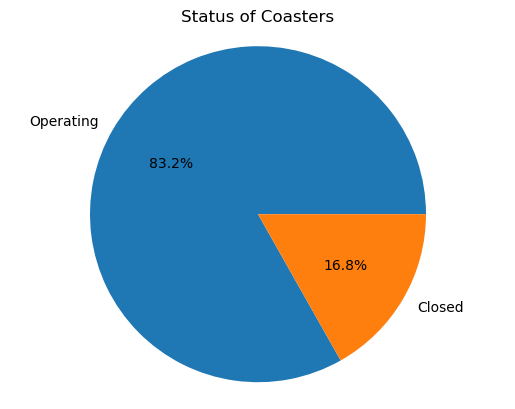

<Figure size 640x480 with 0 Axes>

In [34]:
# 8
# Create a function to plot a pie chart of status.operating
def coaster_status(coaster_df):
    status_df=coaster_df[(coaster_df['status'] == 'status.operating') | (coaster_df['status'] == 'status.closed.definitely')]
    plt.pie(status_df['status'].value_counts(),autopct='%0.1f%%',labels=['Operating','Closed'])
    plt.title('Status of Coasters')
    plt.axis('Equal')
    plt.show()
    plt.clf()
# Create pie chart of roller coasters
coaster_status(roller_coasters)

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

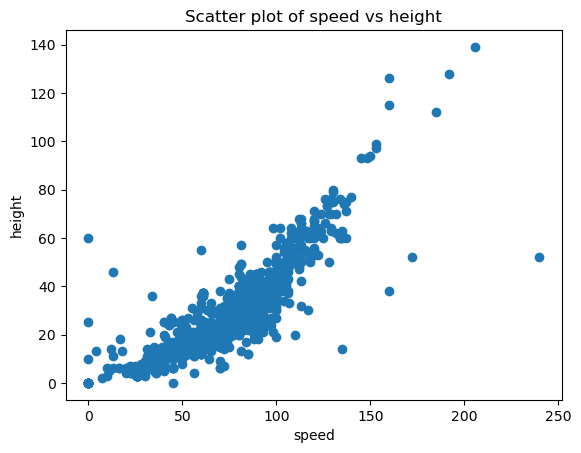

In [37]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(coaster_df,column_1,column_2):
    coaster_df= coaster_df[coaster_df['height'] < 140]
    plt.scatter(coaster_df[column_1],coaster_df[column_2])
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.title('Scatter plot of {} vs {}'.format(column_1,column_2))
    plt.show()
# Create a function to plot scatter of speed vs height
plot_scatter(roller_coasters,'speed','height')

